# Chapter 3: Dynamic Programming

In [1]:
import numpy as np
from typing import Callable

import matplotlib.pyplot as plt
from matplotlib.table import Table

%matplotlib inline

## Example 4.1

Let's estimate state values using giving algorithm 

In [2]:
grid_size = 4
reward = -1
actions = {
    "up": (-1, 0),
    "down": (1, 0),
    "left": (0, -1),
    "right": (0, 1)
}


def equiprobable_random_policy(state: tuple, action: tuple) -> float:
    return 1 / len(actions)


def is_terminal(state: tuple) -> bool:
    x, y = state
    return (x == 0 and y == 0) or (x == grid_size - 1 and y == grid_size - 1)


def step(state: tuple, action: tuple) -> tuple:
    next_state = tuple(np.array(state) + action)
    x, y = next_state
    if x < 0 or x >= grid_size or y < 0 or y >= grid_size:
        next_state = state
    return next_state, reward


def update_state_value(
    state_values: list, state: tuple, policy: Callable[tuple, tuple], discount: float
) -> float:
    if is_terminal(state):
        return 0
    
    value = 0
    for action in actions.values():
        next_state, action_reward = step(state, action)
        value += policy(state, action) * (action_reward + discount * state_values[next_state])
    return value
    

def compute_state_value(policy: Callable[tuple, tuple], discount: float = 1.0, epsilon: float = 1e-10) -> list:
    state_values = np.zeros((grid_size, grid_size))
    states = [(x, y) for x in range(grid_size) for y in range(grid_size)]
    delta = np.inf
    
    while delta > epsilon:
        old_state_values = state_values.copy()
        for state in states:
            state_values[state] = update_state_value(state_values, state, policy, discount)
        delta = abs(old_state_values - state_values).max()
    
    return state_values


def draw_table(state_values: list) -> None:
    fig, ax = plt.subplots()
    tb = Table(ax, bbox=[0, 0, 1, 1])
    for x, row in enumerate(state_values):
        for y, value in enumerate(row):
            tb.add_cell(
                x, y, 1 / len(state_values), 1 / len(row), text=round(value, 1), loc='center', facecolor='white'
            )
            
    ax.add_table(tb)
    ax.set_axis_off()
    return ax

<Axes: >

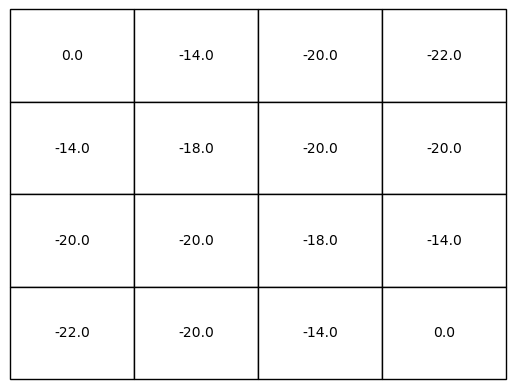

In [3]:
state_values = compute_state_value(equiprobable_random_policy)
draw_table(state_values)

## Exercise 4.1
**Q:** In example 4.1, if $\pi$ is the equiprobable random policy, what is $q_\pi(11, down)$? What is $q_\pi(7, down)$?

**A:**

$q_\pi(11, down) = -1 + q_\pi(T, exit) = -1$

$q_\pi(7, down) = -1 + \sum_{a'} \pi(a'|11) q_\pi(11, a') = -1 + v_\pi(11) = -15 $

## Exercise 4.2
**Q:** In example 4.1, suppose a new state 15 is added to the gridworld just below state 13, and its actions, $left, up, right,$ and $down$, take the agent to states 12, 13, 14, and 15, respectively. Assume that the transitions *from* the original states are unchanged. What, then, is $v_\pi(15)$ for the equiprobable random policy? Now suppose the dynamics of state 13 are also changed, such that action $down$ from state 13 takes the agent to the new state 15. What is $v_\pi(15)$ for the equiprobable random policy in this case?

**A:**

First case (not allowing $down$ transition from the state 13):

$v_\pi(15) = -1 + \sum_{a \in A} \sum_{s' \in S} \pi(a | 15) v_\pi(s') = -1 + 0.25 \cdot (v_\pi(12) + v_\pi(13) + v_\pi(14) + v_\pi(15)) = -1 - 5.5 - 5 - 3.5 + 0.25 \cdot v_\pi(15) $

Solving the euqation for $v_\pi(15)$:

$ v_\pi(15) = \frac{-15}{0.75} = -20 $

Second case (allowing $down$ transition from the state 13):<br>
In this case, state-value functions for states 13 and 15 could be changed because the transition between them becomes allowed:

$v_\pi(13) = -1 + 0.25 \cdot (v_\pi(9) + v_\pi(12) + v_\pi(14) + v_\pi(15)) $

$v_\pi(15) = -1 + 0.25 \cdot (v_\pi(12) + v_\pi(13) + v_\pi(14) + v_\pi(15)) $

Let's make an assumption that other states won't change (although obviously they could) and will take their state values from the Example 4.1:

$v_\pi(13) = -1 + 0.25 \cdot (-20 - 22 - 14 + v_\pi(15)) = -15 + 0.25 \cdot v_\pi(15) $

$v_\pi(15) = -1 + 0.25 \cdot (-22 + v_\pi(13) - 14 + v_\pi(15)) = -10 + 0.25 \cdot v_\pi(13) + 0.25 \cdot v_\pi(15) = \frac{-10 + 0.25 \cdot v_\pi(13)}{0.75} $

Solving the system of equations for $v_\pi(15)$:

$v_\pi(15) = \frac{-10 + 0.25 \cdot (-15 + 0.25 \cdot v_\pi(15))}{0.75} = \frac{-13.75 + 0.125 \cdot v_\pi(15)}{0.75} = \frac{-13.75}{0.625} = -22 $

So, for $v_\pi(13)$, we have:

$v_\pi(13) = -15 - 5.5 = -20.5 $

## Exercise 4.3
**Q:** What are the equations analogous to (4.3), (4.4), and (4.5) for the action-value function $q_\pi$ and its successive approximation by a sequence of functions $q_0, q_1, q_2, \dots$?

**A:**

**Equation (4.3):**

$ v_\pi(s) = \mathop{\mathbb{E}}_\pi [R_{t + 1} + \gamma v_\pi(S_{t + 1}) | S_t = s] $,

and its action-value equivalent:

$ q_\pi(s, a) = \mathop{\mathbb{E}}_\pi [R_{t + 1} + \gamma q_\pi(S_{t + 1}, A_{t + 1}) | S_t = s, A_t = a] $


**Equation (4.4):**

$ v_\pi(s) = \sum_a \pi(a | s) \sum_{s', r} p(s', r | s, a) [r + \gamma v_\pi(s')] $

and its action-value equivalent:

$ q_\pi(s, a) = \sum_{s', r} p(s', r | s, a) [r + \gamma \sum_{a'} \pi(a' | s') q_\pi(s', a')] $

**Equation (4.5):**

$ v_{k + 1} = \sum_a \pi(a | s) \sum_{s', r} p(s', r | s, a) [r + \gamma v_k(s')] $

and its action-value equivalent:

$ q_{k + 1}(s, a) = \sum_{s', r} p(s', r | s, a) [r + \gamma \sum_{a'} \pi(a' | s') q_k(s', a')] $

## Exercise 4.4
**Q:** The policy iteration algorithm on page 80 has a subtle bug in that it may never terminate if the policy continually switches between two or more policies that are equally good. This is ok for pedagogy, but not for actual use. Modify the pseudocode so that convergence is guaranteed.

**Policy Iteration Algorithm:**
1. Initialization<br>
$ V(s) \in \mathop{\mathbb{R}} $ and $ \pi(s) \in A(s) $ arbitrarily for all $ s \in S $

2. Policy Evaluation<br>
Loop:<br>
    $ \Delta = 0 $<br>
    Loop for each $s \in S$:<br>
        $v = V(s)$<br>
        $ V(s) = \sum_{s', r} p(s', r | s, \pi(s))[r + \gamma V(s')] $<br>
        $ \Delta = max(\Delta, |v - V(s)| $<br>
until $\Delta < \theta$ (a small positive number determining the accuracy of estimation)

3. Policy Improvement<br>
*policy-stable = true*<br>
For each $s \in S$<br>
    *old-action* $= \pi(s)$ <br>
    $ \pi(s) = argmax_a \sum_{s', r} p(s', r | s, a)[r + \gamma V(s')] $<br>
    If *old-action* $\neq \pi(s)$, then *policy-stable = false*<br>
If *policy-stable*, then stop and return $ V \approx v_* $ and $\pi \approx \pi_*$; else go to 2

**A:** The described situation will appear if several policies have the same $v_\pi(s)$ and the algorithm will switch between them without improving $V$. To avoid such a situation we can store *old-value-function* $= V(s)$ before the Policy Improvement step and then compare it with the new $V(s)$ after the Policy Evaluation step. And their equality will mean the termination condition.

**Corrected Algorithm**
1. Initialization<br>
$ V(s) \in \mathop{\mathbb{R}} $ and $ \pi(s) \in A(s) $ arbitrarily for all $ s \in S $<br>
*old-value-function* $= -\infty$

2. Policy Evaluation<br>
*policy-stable = true*<br>
Loop:<br>
    $ \Delta = 0 $<br>
    Loop for each $s \in S$:<br>
        $v = V(s)$<br>
        $ V(s) = \sum_{s', r} p(s', r | s, \pi(s))[r + \gamma V(s')] $<br>
        $ \Delta = max(\Delta, |v - V(s)| $<br>
until $\Delta < \theta$ (a small positive number determining the accuracy of estimation)

3. Termination condition check<br>
If *old-value-function* $\neq V$ then *policy-stable = false*<br>
If *policy-stable*, then stop and return $ V \approx v_* $ and $\pi \approx \pi_*$; else continue<br>

3. Policy Improvement<br>
*old-value-function* $= V$<br>
For each $s \in S$<br>
    *old-action* $= \pi(s)$ <br>
    $ \pi(s) = argmax_a \sum_{s', r} p(s', r | s, a)[r + \gamma V(s')] $<br>
    If *old-action* $\neq \pi(s)$, then *policy-stable = false*<br>
Go to 2

## Exercise 4.5
**Q:** How would policy iteration be defined for action values? Give a complete algorithm for computing $q_*$, analogous to that on page 80 for computing $v_*$. Please pay special attention to this exercise, because the ideas involved will be used throughout the rest of the book.

**A:**
**Policy Iteration Algorithm for action-value function:**
1. Initialization<br>
$ Q(s, a) \in \mathop{\mathbb{R}} $ and $ \pi(s) \in A(s) $ arbitrarily for all $ s \in S $

2. Policy Evaluation<br>
Loop:<br>
    $ \Delta = 0 $<br>
    Loop for each $s \in S$:<br>
        Loop for each $a \in A(s):$<br>
            $q = Q(s, a)$<br>
            $ Q(s, a) = \sum_{s', r} p(s', r | s, \pi(s))[r + \gamma \sum_{a'} \pi(s', a') Q(s', a')] $<br>
            $ \Delta = max(\Delta, |q - Q(s, a)| $<br>
until $\Delta < \theta$ (a small positive number determining the accuracy of estimation)

3. Policy Improvement<br>
*policy-stable = true*<br>
For each $s \in S$<br>
    *old-action* $= \pi(s)$ <br>
    $ \pi(s) = argmax_a Q(s, a) $<br>
    If *old-action* $\neq \pi(s)$, then *policy-stable = false*<br>
If *policy-stable*, then stop and return $ Q \approx q_* $ and $\pi \approx \pi_*$; else go to 2

## Exercise 4.6
**Q:** Suppose you are restricted to considering only policies that are $\epsilon-soft$, meaning that the probability of selecting each action in each state, $s$, is at least $\epsilon / |A(s)|$. Describe qualitatively the changes that would be required in each of the steps 3, 2, and 1, in that order, of the policy iteration algorithm for $v_*$ on page 80.

**A:**<br>
**Step 3: Policy Improvement**: Under an $\epsilon-soft$ policy requirement, we cannot have a deterministic policy where one action has a probability of 1 and all others have a probability of 0. Instead, we must ensure that all actions have at least the minimum probability of being selected. Therefore, the policy improvement step would need to be adjusted to output an $\epsilon-soft$ policy rather than a greedy policy.<br>
Instead of choosing the best action deterministically, we need to construct a policy where the best action (or one of the best actions if there is a tie) is selected with probability $1 - \epsilon + \frac{\epsilon}{|A(s)|}$.

**Step 2: Policy Evaluation**: The Bellman equation for policy evaluation would need to reflect the probability distribution of the $\epsilon-soft$ policy. That is, the expected value for each state would be the sum over all actions weighted by the probability of taking each action under the $\epsilon-soft$ policy.<br>

$ V(s) = \sum_a \pi(a|s) \sum_{s', r} p(s', r | s, \pi(s))[r + \gamma V(s')] $

The iterative update rule would therefore incorporate the $\epsilon-soft$ probabilities into the calculation of $v_\pi$ for the current policy $\pi$. This would slightly slow convergence since the value of each state must now reflect the effect of suboptimal actions being taken with non-zero probability.

**Step 1: Policy Initialization**: At the beginning of policy iteration, we usually initialize the policy arbitrarily. With the restriction of only considering $\epsilon-soft$ policies, the initial policy must also be an $\epsilon-soft$ policy.<br>

## Exercise 4.7 (Jack's Car Rental)
**Q:** Write a program for policy iteration and re-solve Jack's car rental problem with the following changes. One of Jack's employees at the first location rides a bus home each night and lives near the second location. She is happy to shuttle one car to the second location for free. Each additional car still costs \\$2, as do all cars moved in the other direction. In addition, Jack has limited parking space at each location. If more than 10 cars are kept overnight at a location (after any moving of cars), then an additional cost of \\$4 must be incurred to use a second parking lot (independent of how many cars are kept there). These sorts of nonlinearities and arbitrary dynamics often occur in real problems and cannot easily be handled by optimization methods other than dynamic programming. To check your program, first replicate the results given for the original problem.

### Linear problem

In [4]:
from jacks_car_rental import JacksCarRental
from policy_iterators import PolicyIterator

In [5]:
rental = JacksCarRental()

days = 365
rewards = np.zeros(days, dtype=int)
actions = np.zeros(days, dtype=int)
states = np.zeros([days, len(rental.observation_space.nvec)], dtype=int)

for day in range(days):
    actions[day] = rental.action_space.sample()
    states[day], rewards[day], done, info = rental.step(actions[day])

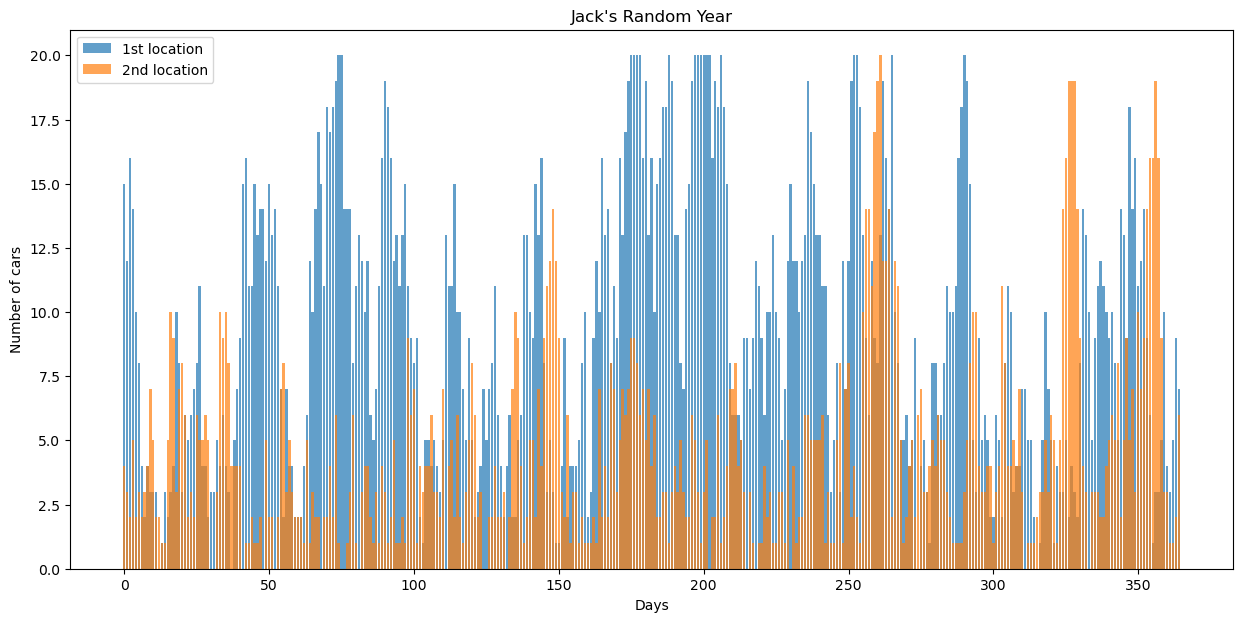

In [6]:
plt.figure(figsize=(15, 7))
plt.bar(range(days), states[:, 0], alpha=0.7, label="1st location")
plt.bar(range(days), states[:, 1], alpha=0.7, label="2nd location")
plt.title("Jack's Random Year")
plt.xlabel("Days")
plt.ylabel("Number of cars")
plt.legend()

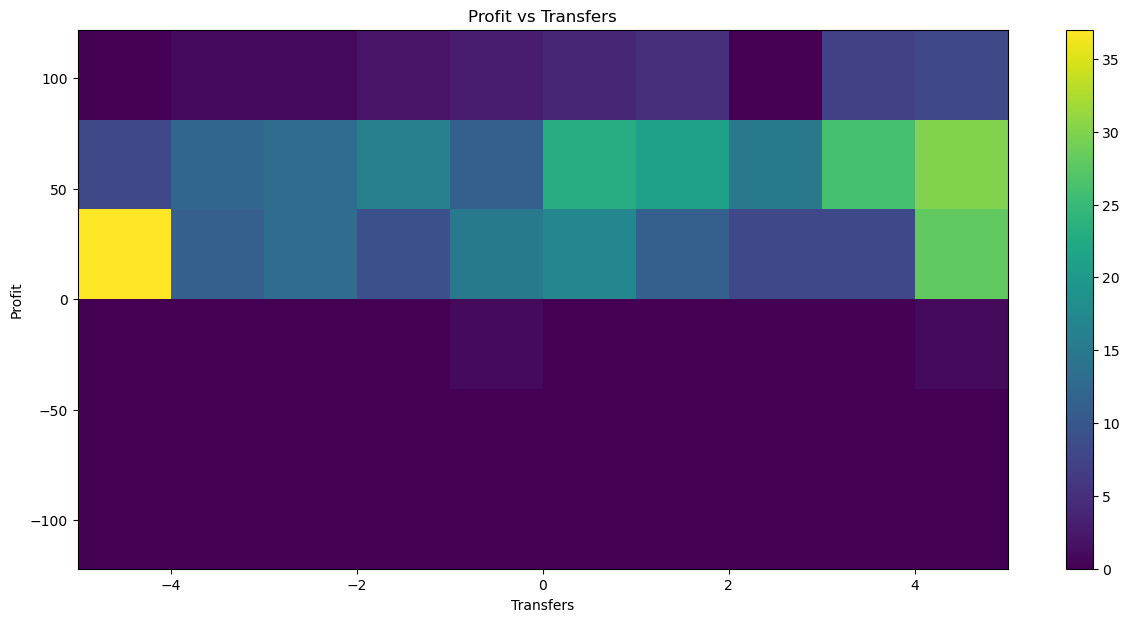

In [7]:
plt.figure(figsize=(15, 7))
plt.hist2d(
    actions, 
    rewards,
    bins=[rental.action_space.n - 1, 6],
    range=[[-rental.max_transfers, rental.max_transfers], [-np.abs(rewards).max(), rewards.max()]]
)
plt.title("Profit vs Transfers")
plt.xlabel("Transfers")
plt.ylabel("Profit")
plt.colorbar()

In [8]:
policy_iterator = PolicyIterator(rental)
value, policy = policy_iterator.find_optimal_policy()

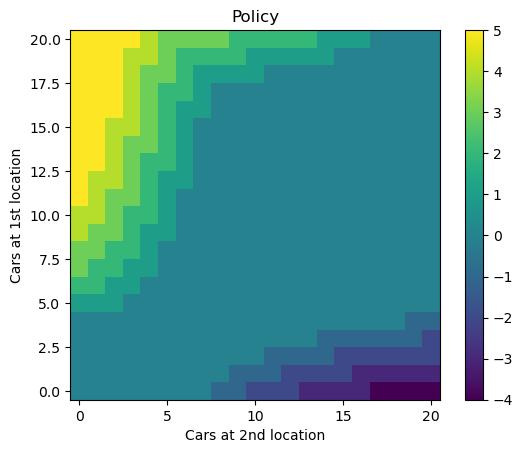

In [9]:
plt.figure()
plt.imshow(policy, origin='lower')
plt.title("Policy")
plt.ylabel("Cars at 1st location")
plt.xlabel("Cars at 2nd location")
plt.colorbar()

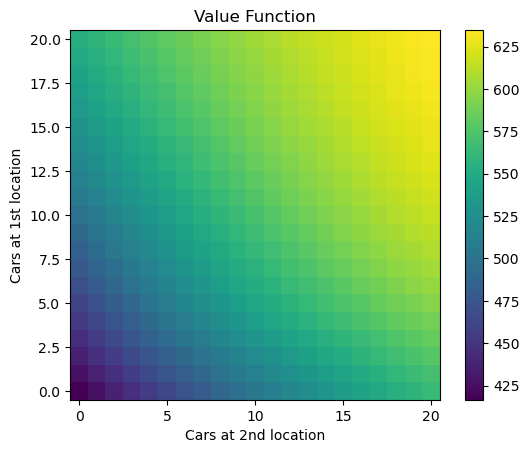

In [10]:
plt.figure()
plt.imshow(value, origin='lower')
plt.title("Value Function")
plt.ylabel("Cars at 1st location")
plt.xlabel("Cars at 2nd location")
plt.colorbar()

### Non-Linear problem

In [11]:
from jacks_car_rental import NonLinearJacksCarRental

In [12]:
rental = NonLinearJacksCarRental()

days = 365
rewards = np.zeros(days, dtype=int)
actions = np.zeros(days, dtype=int)
states = np.zeros([days, len(rental.observation_space.nvec)], dtype=int)

for day in range(days):
    actions[day] = rental.action_space.sample()
    states[day], rewards[day], done, info = rental.step(actions[day])

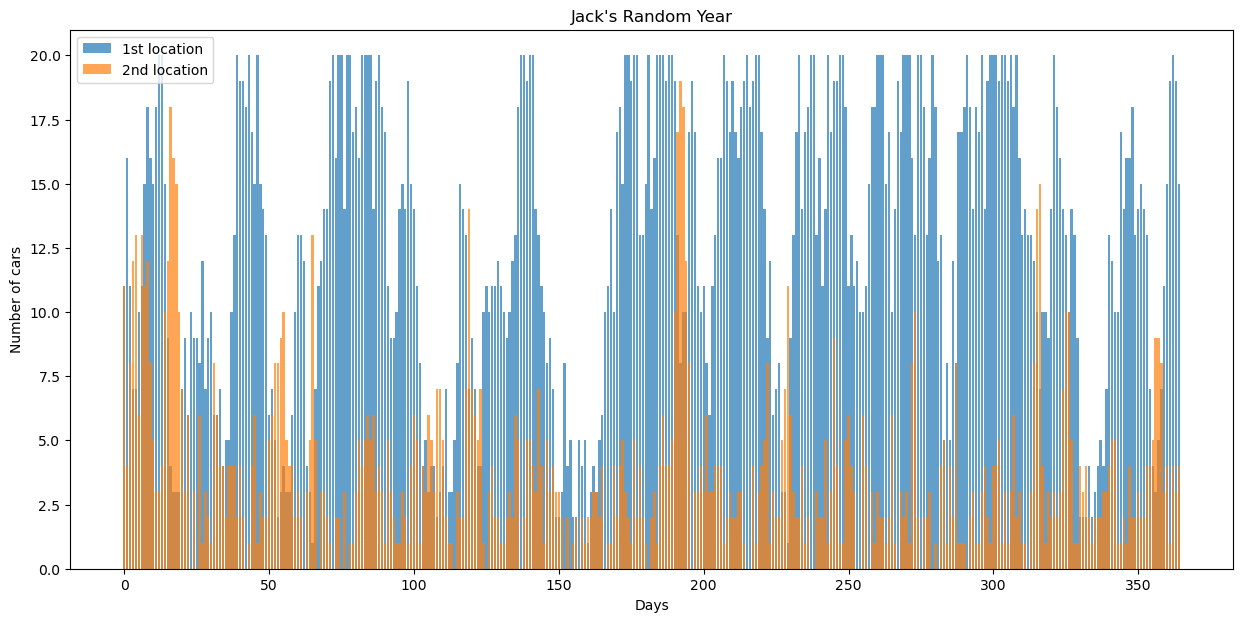

In [13]:
plt.figure(figsize=(15, 7))
plt.bar(range(days), states[:, 0], alpha=0.7, label="1st location")
plt.bar(range(days), states[:, 1], alpha=0.7, label="2nd location")
plt.title("Jack's Random Year")
plt.xlabel("Days")
plt.ylabel("Number of cars")
plt.legend()

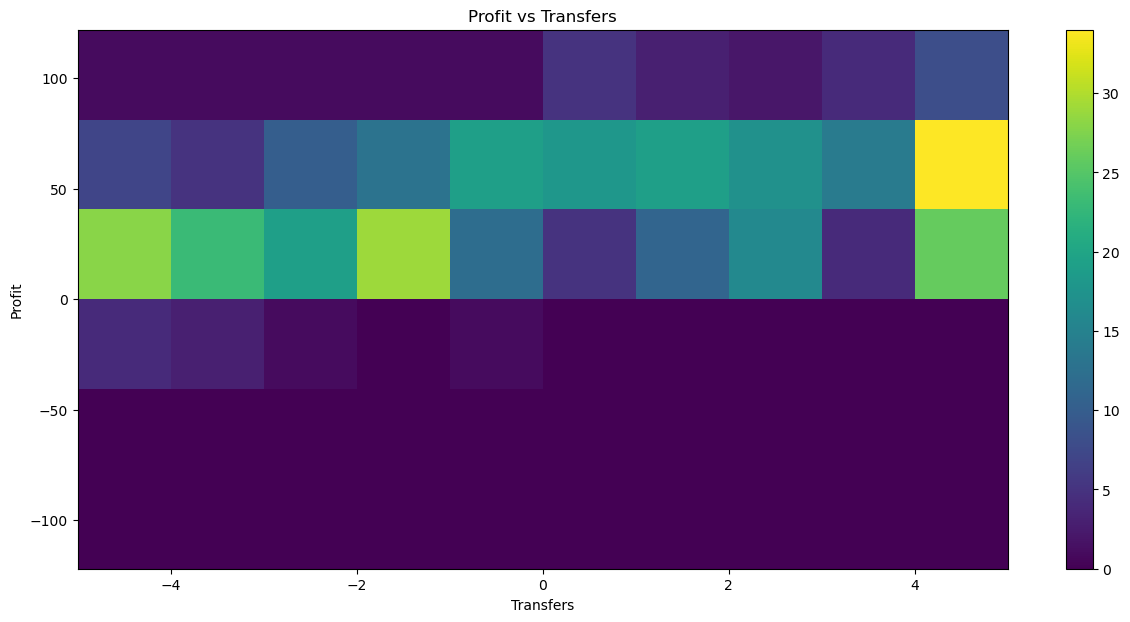

In [14]:
plt.figure(figsize=(15, 7))
plt.hist2d(
    actions, 
    rewards,
    bins=[rental.action_space.n - 1, 6],
    range=[[-rental.max_transfers, rental.max_transfers], [-np.abs(rewards).max(), rewards.max()]]
)
plt.title("Profit vs Transfers")
plt.xlabel("Transfers")
plt.ylabel("Profit")
plt.colorbar()

In [15]:
policy_iterator = PolicyIterator(rental)
value, policy = policy_iterator.find_optimal_policy()

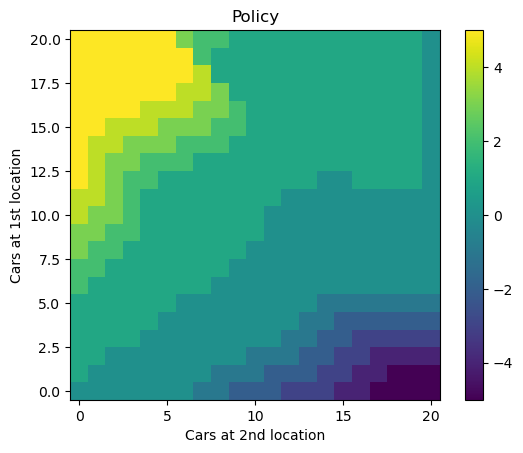

In [16]:
plt.figure()
plt.imshow(policy, origin='lower')
plt.title("Policy")
plt.ylabel("Cars at 1st location")
plt.xlabel("Cars at 2nd location")
plt.colorbar()

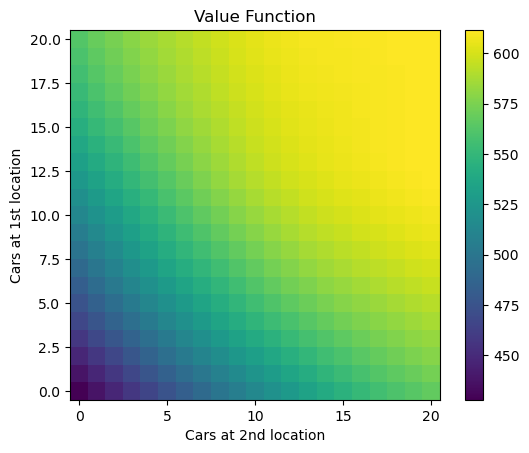

In [17]:
plt.figure()
plt.imshow(value, origin='lower')
plt.title("Value Function")
plt.ylabel("Cars at 1st location")
plt.xlabel("Cars at 2nd location")
plt.colorbar()

## Gambler's Problem
## Exercise 4.8
**Q:** Why does the optimal policy for the gambler's problem have such a curious form? In particular, for capital of 50 it bets it all on one flip, but for capital of 51 it doesn't. Why is this a good policy?

**A:** The optimal policy's structure, particularly the strategy of betting it all at some points and not at others, can seem puzzling at first. However, this strategy is shaped by the goal structure and the rules of the betting game.<br><br>
If the gambler bets all 50, they will either reach the target of 100 (with a win) or drop to 0 (with a loss). Betting all capital at this midpoint (50) offers a direct, albeit risky, route to the goal. This is a key point—at capital 50, the gambler is exactly one successful bet away from winning, and losing the bet directly resets the game without additional loss, as they are no better off from any lower capital point below 50 due to symmetric potential gains and losses.<br><br>
If the gambler has a capital of 51 and he bets only 1, he would either go down to 50 which in one potential bet from the win, or will start to slightly reach another peak of 62-63 from where they can leap to 75, which in one bet from either 50 or 100. From the other side, the gambler could bet 49 at the capital of 51, which also could win the game in one bet, but in case of the bet flip it would bring them to the capital of 2 and the journey from it to the win would be much longer and riskier.<br><br>
So this policy focuses on reaching the special milestones from which the gambler should make bets trying to leap to another milestone, such as (25 -> [50 | T] -> [100 | T]) or (75 -> [50 | 100])

## Exercise 4.9
**Q:** Implement value iteration for the gambler's problem and solve it for $p_h = 0.25$ and $p_h = 0.55$. In programming, you may find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values 0 and 1 respectively. Show your results graphically, as in Figure 4.3. Are your results stable as $\theta \to 0$?

In [18]:
from gamblers_problem import GamblersProblem
from policy_iterators import ValueIterator

In [19]:
gamblers_problem = GamblersProblem()

bets = []
capitals = []

done = False
while not done:
    bet = 1
    capital, reward, done, info = gamblers_problem.step(bet)
    capitals += [capital]

plt.plot(capitals)
plt.title("Example episode")
plt.xlabel("Timestamp")
plt.ylabel("Capital")

In [20]:
def plot_results(value, policy):    
    if value is not None:
        plt.figure()
        plt.title("Value Function")
        plt.xlabel("Capital")
        plt.ylabel("Win Probability")
        plt.bar(range(len(value)), value)

    if policy is not None:
        plt.figure()
        plt.title("Policy")
        plt.xlabel("Capital")
        plt.ylabel("Bet")
        plt.bar(range(len(policy)), policy + 1)

### $p_h = 0.25$

In [21]:
gamblers_problem = GamblersProblem(p_win=0.25)
value_iterator = ValueIterator(gamblers_problem, tolerance=1e-10)
value, policy = value_iterator.find_optimal_policy()

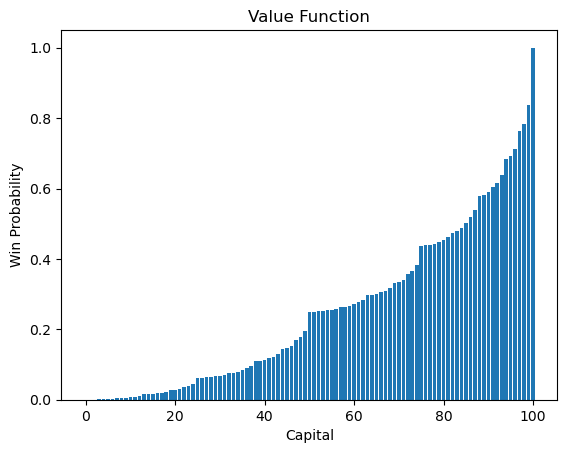

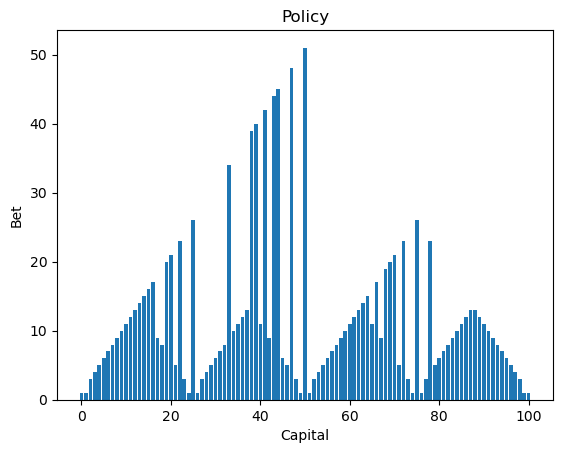

In [22]:
plot_results(value, policy)

### $p_h = 0.55$

In [23]:
gamblers_problem = GamblersProblem(p_win=0.55)
value_iterator = ValueIterator(gamblers_problem, tolerance=1e-10)
value, policy = value_iterator.find_optimal_policy()

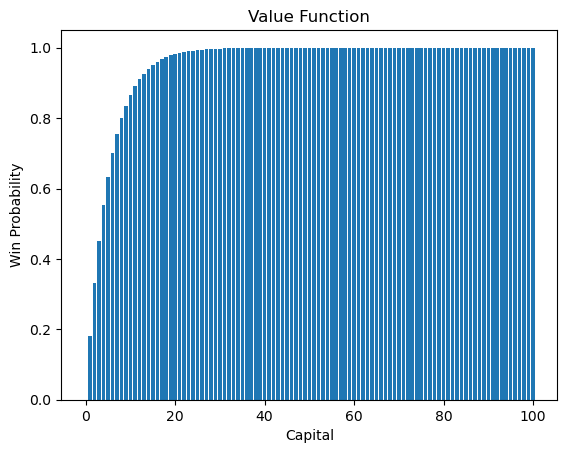

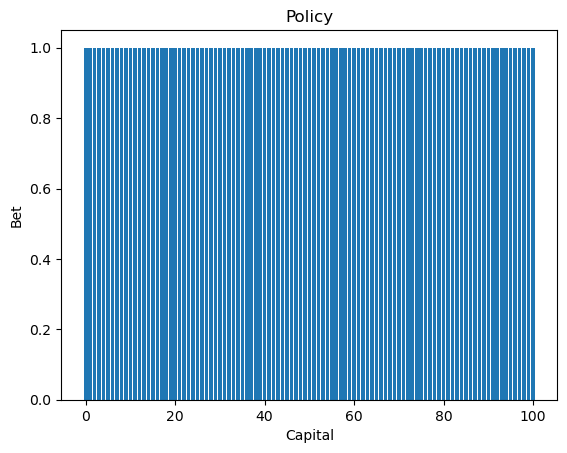

In [24]:
plot_results(value, policy)

## Exercise 4.10
**Q:** What is the analog of the value iteration update (4.10) for action values, $q_{k+1}(s, a)$?

**A:**
$q_{k+1}(s, a) = \sum_{s', r} p(s', r | s, a) [r + \gamma \max_{a'} q_k (s', a')]$